In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

In [4]:
# Load datasets
train_x = pd.read_csv('datasets/football_train_x.csv')
train_y = pd.read_csv('datasets/football_train_y.csv')
test_x = pd.read_csv('datasets/football_test_x.csv')
test_y = pd.read_csv('datasets/football_test_y.csv')
features = list(train_x.columns.values)

# Print dataframe
train_x

,HomeTeam,AwayTeam,HTHG,HTAG,HTR,HS,AS,HST,AST,HF,AF,HC,AC
0,19,8,2,1,1,18,6,7,2,8,10,5,4
1,24,16,2,0,1,12,8,6,3,12,13,5,1
2,3,12,0,0,0,13,8,4,4,8,8,0,11
3,2,20,0,0,0,7,6,2,2,10,10,2,6
4,24,9,0,1,-1,14,11,6,3,13,16,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
793,25,20,0,0,0,10,16,3,6,11,14,4,7
794,6,16,1,0,1,16,15,5,4,6,12,5,4
795,9,2,0,2,-1,6,15,1,7,9,13,2,3
796,0,7,1,0,1,15,11,6,8,5,17,5,4


In [5]:
# Correlation matrix for training
corr = train_x.corr()
corr = corr.style.background_gradient(cmap='coolwarm', axis=None).set_precision(2)
corr

,HomeTeam,AwayTeam,HTHG,HTAG,HTR,HS,AS,HST,AST,HF,AF,HC,AC
HomeTeam,1,-0.047,0.00082,-0.041,0.024,0.06,0.026,0.026,0.011,0.015,0.056,0.039,0.037
AwayTeam,-0.047,1,-0.027,-0.014,0.0027,-0.028,0.03,-0.024,0.016,0.0049,-0.013,0.022,0.072
HTHG,0.00082,-0.027,1,-0.072,0.67,0.16,-0.048,0.41,-0.081,-0.067,0.049,-0.041,0.018
HTAG,-0.041,-0.014,-0.072,1,-0.66,-0.12,0.19,-0.12,0.4,0.066,-0.00024,-0.1,-0.064
HTR,0.024,0.0027,0.67,-0.66,1,0.17,-0.16,0.33,-0.31,-0.086,0.03,0.039,0.055
HS,0.06,-0.028,0.16,-0.12,0.17,1,-0.49,0.71,-0.32,-0.12,0.016,0.58,-0.4
AS,0.026,0.03,-0.048,0.19,-0.16,-0.49,1,-0.34,0.68,0.088,-0.052,-0.38,0.55
HST,0.026,-0.024,0.41,-0.12,0.33,0.71,-0.34,1,-0.24,-0.04,0.0045,0.37,-0.26
AST,0.011,0.016,-0.081,0.4,-0.31,-0.32,0.68,-0.24,1,0.099,-0.059,-0.24,0.29
HF,0.015,0.0049,-0.067,0.066,-0.086,-0.12,0.088,-0.04,0.099,1,0.11,-0.074,0.0019


In [6]:
# Correlation matrix for testing
corr = test_x.corr()
corr = corr.style.background_gradient(cmap='coolwarm', axis=None).set_precision(2)
corr

,HomeTeam,AwayTeam,HTHG,HTAG,HTR,HS,AS,HST,AST,HF,AF,HC,AC
HomeTeam,1,-0.06,-0.057,0.038,-0.044,-0.016,0.042,0.0057,0.046,-0.058,-0.047,-0.047,-0.0027
AwayTeam,-0.06,1,-0.0092,0.055,-0.028,0.014,0.1,-0.026,0.0066,0.0059,0.054,0.062,0.11
HTHG,-0.057,-0.0092,1,-0.072,0.71,0.14,-0.12,0.34,-0.16,-0.077,0.017,-0.043,0.074
HTAG,0.038,0.055,-0.072,1,-0.62,-0.061,0.17,-0.094,0.39,0.088,0.067,-0.05,0.04
HTR,-0.044,-0.028,0.71,-0.62,1,0.13,-0.15,0.32,-0.31,-0.099,-0.051,0.0099,0.0074
HS,-0.016,0.014,0.14,-0.061,0.13,1,-0.49,0.7,-0.33,-0.11,0.033,0.58,-0.41
AS,0.042,0.1,-0.12,0.17,-0.15,-0.49,1,-0.38,0.66,0.11,-0.091,-0.41,0.53
HST,0.0057,-0.026,0.34,-0.094,0.32,0.7,-0.38,1,-0.24,-0.11,-0.029,0.37,-0.27
AST,0.046,0.0066,-0.16,0.39,-0.31,-0.33,0.66,-0.24,1,0.11,-0.052,-0.23,0.3
HF,-0.058,0.0059,-0.077,0.088,-0.099,-0.11,0.11,-0.11,0.11,1,0.093,-0.14,0.029


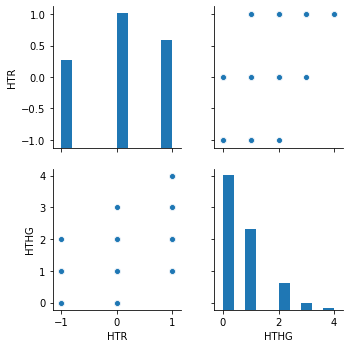

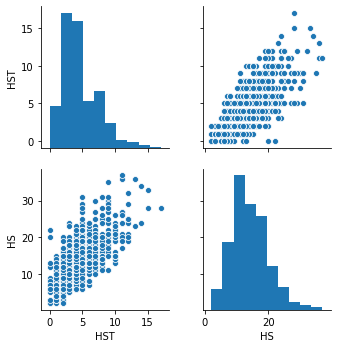

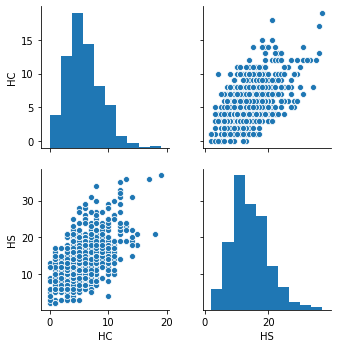

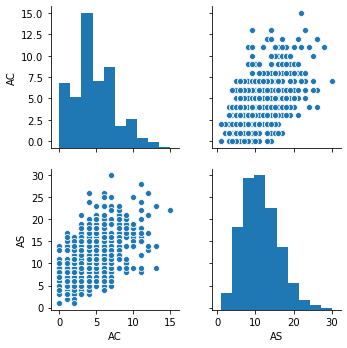

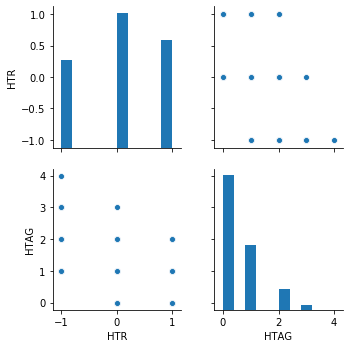

In [40]:
# Pairwise plot for training

sns.pairplot(train_x, vars=["HTR", "HTHG"])
sns.pairplot(train_x, vars=["HST", "HS"])
sns.pairplot(train_x, vars=["HC", "HS"])
sns.pairplot(train_x, vars=["AC", "AS"])
sns.pairplot(train_x, vars=["HTR", "HTAG"])

In [42]:
# PCA projection using 2 components
# https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60

train_x_std = StandardScaler().fit_transform(train_x)
test_x_std = StandardScaler().fit_transform(test_x)

# 2 components of training
N = 13
pca = PCA(n_components=N)
principal_components = pca.fit_transform(train_x_std)
#train_pca = pd.DataFrame(data = principal_components, columns = ['Principal Component 1', 'Principal Component 2'])
#train_pca

[0.26021796 0.40739102 0.5066118  0.59428417 0.67381208 0.75190384
 0.81955341 0.87964114 0.92201231 0.95802595 0.97663433 0.99276969
 1.        ]


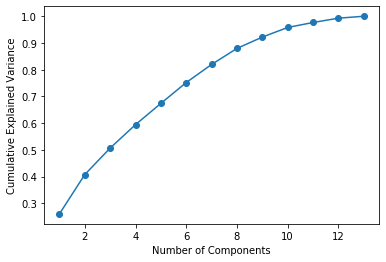

In [9]:
# Plot cumulative explained variance

ratios = pca.explained_variance_ratio_
print(np.cumsum(ratios))
plt.plot(range(1, N + 1), np.cumsum(ratios), '-o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance');

In [36]:
# 2 and 3 components for training and testing (to be used later)
pca = PCA(n_components=2)
pca2_train_x = pca.fit_transform(train_x_std)
pca2_test_x = pca.fit_transform(test_x_std)

pca = PCA(n_components=9)
pca9_train_x = pca.fit_transform(train_x_std)
pca9_test_x = pca.fit_transform(test_x_std)

In [11]:
# Function to output the Linear Regression function

def print_lin_reg(coefs, features, y):
    s = y + " = "
    for i in range(len(coefs) - 1):
        s += "{0:0.2f}".format(coefs[i]) + "*" + features[i] + " + "
    s += "{0:0.2f}".format(coefs[len(coefs) - 1]) + "*" + features[len(coefs) - 1]
    print(s)

In [32]:
# Linear Regression to determine number of goals

linreg = LinearRegression()

linreg.fit(train_x, train_y["FTG"])
linpred = linreg.predict(test_x)

#print_lin_reg(linreg.coef_, features, "FTG")
print("Mean squared error: %.2f"
      % np.sqrt(mean_squared_error(test_y["FTG"], linpred)))
print('Variance score: %.2f' % r2_score(test_y["FTG"], linpred))

FTG = 0.01*HomeTeam + -0.00*AwayTeam + 0.87*HTHG + 0.74*HTAG + -0.09*HTR + -0.01*HS + -0.01*AS + 0.17*HST + 0.18*AST + -0.00*HF + -0.03*AF + -0.04*HC + -0.01*AC
Mean squared error: 1.22
Variance score: 0.52


In [33]:
# Polynomial Regression to determine number of goals
# https://towardsdatascience.com/polynomial-regression-bbe8b9d97491

polynomial_features= PolynomialFeatures(degree=2)
poly_train_x = polynomial_features.fit_transform(train_x)
poly_test_x = polynomial_features.fit_transform(test_x)

linreg = LinearRegression()

linreg.fit(poly_train_x, train_y["FTG"])
linpred = linreg.predict(poly_test_x)

#print_lin_reg(linreg.coef_, features, "FTG")
#print(linreg.coef_)
print("Mean squared error: %.2f"
      % np.sqrt(mean_squared_error(test_y["FTG"], linpred)))
print('Variance score: %.2f' % r2_score(test_y["FTG"], linpred))

Mean squared error: 1.23
Variance score: 0.51


In [34]:
# Same thing, but using PCA 2

linreg = LinearRegression()

linreg.fit(pca2_train_x, train_y["FTG"])
linpred = linreg.predict(pca2_test_x)

#print_lin_reg(linreg.coef_, features, "FTG")
print("Linear Regression with PCA 2")
print("Mean squared error: %.2f"
      % mean_squared_error(test_y["FTG"], linpred))
print('Variance score: %.2f' % r2_score(test_y["FTG"], linpred))

#---------

polynomial_features= PolynomialFeatures(degree=2)
poly_train_x = polynomial_features.fit_transform(pca2_train_x)
poly_test_x = polynomial_features.fit_transform(pca2_test_x)

linreg = LinearRegression()

linreg.fit(poly_train_x, train_y["FTG"])
linpred = linreg.predict(poly_test_x)

#print_lin_reg(linreg.coef_, features, "FTG")
#print(linreg.coef_)
print("\nPolynomial Regression with PCA 2")
print("Mean squared error: %.2f"
      % np.sqrt(mean_squared_error(test_y["FTG"], linpred)))
print('Variance score: %.2f' % r2_score(test_y["FTG"], linpred))

Linear Regression with PCA 2
Mean squared error: 3.16
Variance score: -0.02

Polynomial Regression with PCA 2
Mean squared error: 1.96
Variance score: -0.24


In [39]:
# Same thing, but using PCA 9

linreg = LinearRegression()

linreg.fit(pca9_train_x, train_y["FTG"])
linpred = linreg.predict(pca9_test_x)

#print_lin_reg(linreg.coef_, features, "FTG")
print("Linear Regression with PCA 9")
print("Mean squared error: %.2f"
      % mean_squared_error(test_y["FTG"], linpred))
print('Variance score: %.2f' % r2_score(test_y["FTG"], linpred))

#---------

polynomial_features= PolynomialFeatures(degree=2)
poly_train_x = polynomial_features.fit_transform(pca9_train_x)
poly_test_x = polynomial_features.fit_transform(pca9_test_x)

linreg = LinearRegression()

linreg.fit(poly_train_x, train_y["FTG"])
linpred = linreg.predict(poly_test_x)

#print_lin_reg(linreg.coef_, features, "FTG")
#print(linreg.coef_)
print("\nPolynomial Regression with PCA 9")
print("Mean squared error: %.2f"
      % np.sqrt(mean_squared_error(test_y["FTG"], linpred)))
print('Variance score: %.2f' % r2_score(test_y["FTG"], linpred))

Linear Regression with PCA 9
Mean squared error: 2.11
Variance score: 0.32

Polynomial Regression with PCA 9
Mean squared error: 1.48
Variance score: 0.30


In [27]:
#Accuracy = (TP+TN)/(TP+TN+FP+FN) 
def pr(tn, fp, fn, tp):
    print("Accuracy: " + str((tp+tn) / (tp+tn+fp+fn)))

In [28]:
# Classifying match as interesting using k-NN

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(train_x, train_y["Interest"])
knnpred = knn.predict(test_x)
tn, fp, fn, tp = confusion_matrix(test_y["Interest"], knnpred).ravel()
print("k-NN")
print("True negatives: " + str(tn))
print("False positives: " + str(fp))
print("False negatives: " + str(fn))
print("True positives: " + str(tp))
pr(tn, fp, fn, tp)

k-NN
True negatives: 146
False positives: 48
False negatives: 88
True positives: 60
Accuracy: 0.6023391812865497


In [29]:
# Classifying match as interesting using Logistic Regression

lr = LogisticRegression()
lr.fit(train_x, train_y["Interest"])
lrpred = lr.predict(test_x)
tn, fp, fn, tp = confusion_matrix(test_y["Interest"], lrpred).ravel()
print("Logistic Regression")
print("True negatives: " + str(tn))
print("False positives: " + str(fp))
print("False negatives: " + str(fn))
print("True positives: " + str(tp))
pr(tn, fp, fn, tp)

Logistic Regression
True negatives: 147
False positives: 47
False negatives: 66
True positives: 82
Accuracy: 0.6695906432748538


c:\program files\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


k-NN, PCA 2
True negatives: 123
False positives: 71
False negatives: 104
True positives: 44
Accuracy: 0.48830409356725146

Logistic Regression, PCA 2
True negatives: 157
False positives: 37
False negatives: 127
True positives: 21
Accuracy: 0.52046783625731


c:\program files\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


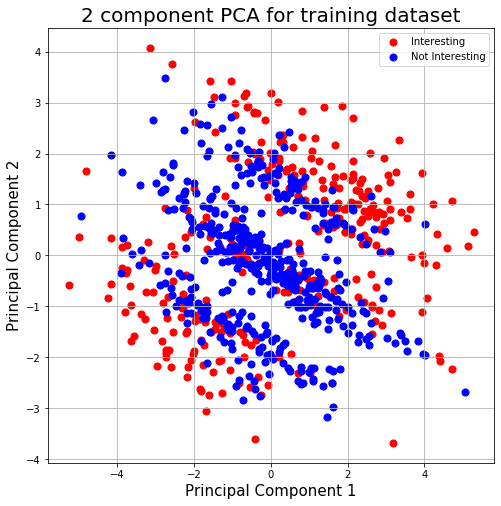

In [30]:
# Same, but using PCA 2

# Plotting it first
finalDf = pd.DataFrame({"principal component 1": pca2_train_x[:,0], "principal component 2": pca2_train_x[:,1]})
finalDf = pd.concat([finalDf, train_y], axis=1, join='inner')

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA for training dataset', fontsize = 20)

targets = ['Interesting', 'Not Interesting']
targets_id = [1, 0]
colors = ['r', 'b']
for target, color in zip(targets_id,colors):
    indicesToKeep = finalDf["Interest"] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(pca2_train_x, train_y["Interest"])
knnpred = knn.predict(pca2_test_x)
tn, fp, fn, tp = confusion_matrix(test_y["Interest"], knnpred).ravel()
print("k-NN, PCA 2")
print("True negatives: " + str(tn))
print("False positives: " + str(fp))
print("False negatives: " + str(fn))
print("True positives: " + str(tp))
pr(tn, fp, fn, tp)

lr = LogisticRegression()
lr.fit(pca2_train_x, train_y["Interest"])
lrpred = lr.predict(pca2_test_x)
tn, fp, fn, tp = confusion_matrix(test_y["Interest"], lrpred).ravel()
print("\nLogistic Regression, PCA 2")
print("True negatives: " + str(tn))
print("False positives: " + str(fp))
print("False negatives: " + str(fn))
print("True positives: " + str(tp))
pr(tn, fp, fn, tp)

In [38]:
# Same, but using PCA 9

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(pca9_train_x, train_y["Interest"])
knnpred = knn.predict(pca9_test_x)
tn, fp, fn, tp = confusion_matrix(test_y["Interest"], knnpred).ravel()
print("k-NN, PCA 9")
print("True negatives: " + str(tn))
print("False positives: " + str(fp))
print("False negatives: " + str(fn))
print("True positives: " + str(tp))
pr(tn, fp, fn, tp)

lr = LogisticRegression()
lr.fit(pca9_train_x, train_y["Interest"])
lrpred = lr.predict(pca9_test_x)
tn, fp, fn, tp = confusion_matrix(test_y["Interest"], lrpred).ravel()
print("\nLogistic Regression, PCA 9")
print("True negatives: " + str(tn))
print("False positives: " + str(fp))
print("False negatives: " + str(fn))
print("True positives: " + str(tp))
pr(tn, fp, fn, tp)

k-NN, PCA 9
True negatives: 130
False positives: 64
False negatives: 117
True positives: 31
Accuracy: 0.47076023391812866


c:\program files\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



Logistic Regression, PCA 9
True negatives: 132
False positives: 62
False negatives: 93
True positives: 55
Accuracy: 0.5467836257309941
